In [1]:
import matplotlib.pylab as plt

In [2]:
import processing.load_dataset as load_dataset

In [3]:
load_dataset.generate_df(load_dataset.img_dir)

,image_path
0,..\data\wiki_crop_filtered_mirrored_pose\10004...
1,..\data\wiki_crop_filtered_mirrored_pose\10005...
2,..\data\wiki_crop_filtered_mirrored_pose\10006...
3,..\data\wiki_crop_filtered_mirrored_pose\10013...
4,..\data\wiki_crop_filtered_mirrored_pose\10013...
...,...
6656,..\data\wiki_crop_filtered_mirrored_pose\99925...
6657,..\data\wiki_crop_filtered_mirrored_pose\99938...
6658,..\data\wiki_crop_filtered_mirrored_pose\99941...
6659,..\data\wiki_crop_filtered_mirrored_pose\99964...


In [4]:
data, dataset, data_loader = load_dataset.generate_dataset(load_dataset.img_dir) 

In [5]:
data

,image_path
0,..\data\wiki_crop_filtered_mirrored_pose\10004...
1,..\data\wiki_crop_filtered_mirrored_pose\10005...
2,..\data\wiki_crop_filtered_mirrored_pose\10006...
3,..\data\wiki_crop_filtered_mirrored_pose\10013...
4,..\data\wiki_crop_filtered_mirrored_pose\10013...
...,...
6656,..\data\wiki_crop_filtered_mirrored_pose\99925...
6657,..\data\wiki_crop_filtered_mirrored_pose\99938...
6658,..\data\wiki_crop_filtered_mirrored_pose\99941...
6659,..\data\wiki_crop_filtered_mirrored_pose\99964...


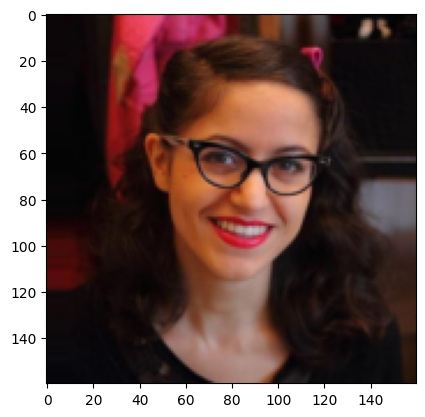

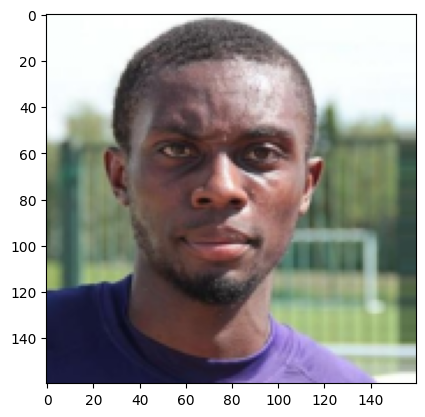

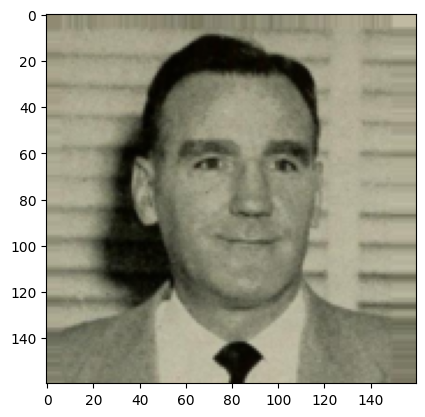

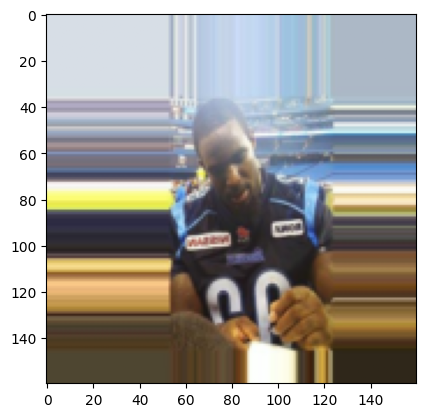

CPU times: total: 109 ms
Wall time: 779 ms


In [6]:
%%time
train_features, target = next(iter(data_loader))
for i in range(4):
    img = train_features[i].squeeze()
    plt.imshow(img)
    plt.show()